<a href="https://colab.research.google.com/github/EricMencarini/Cluster_Kmeans/blob/main/Kmeans_clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

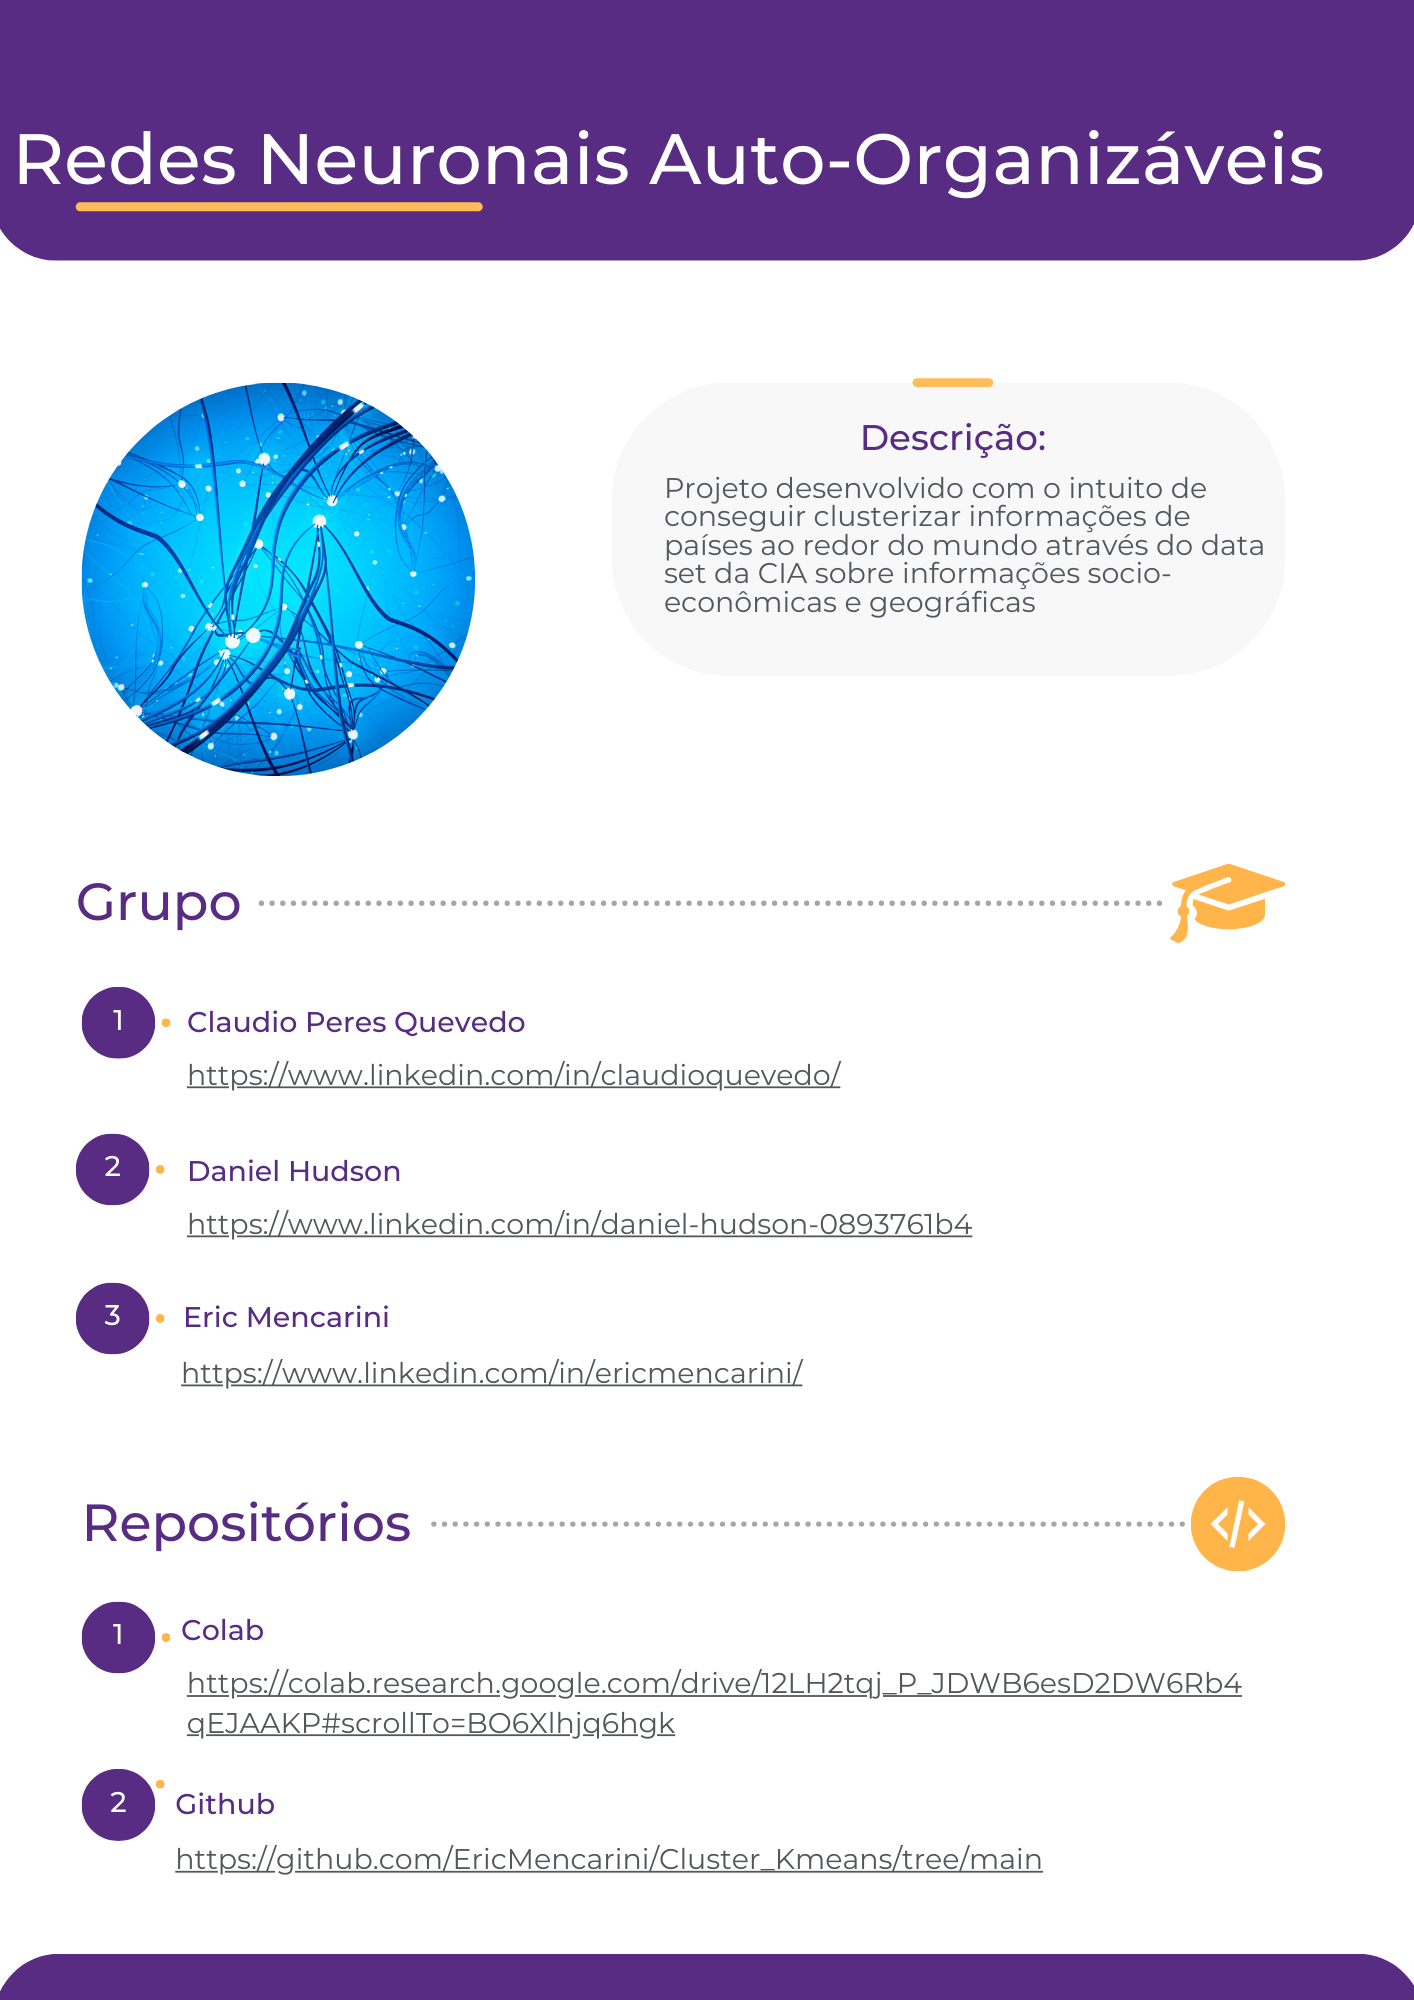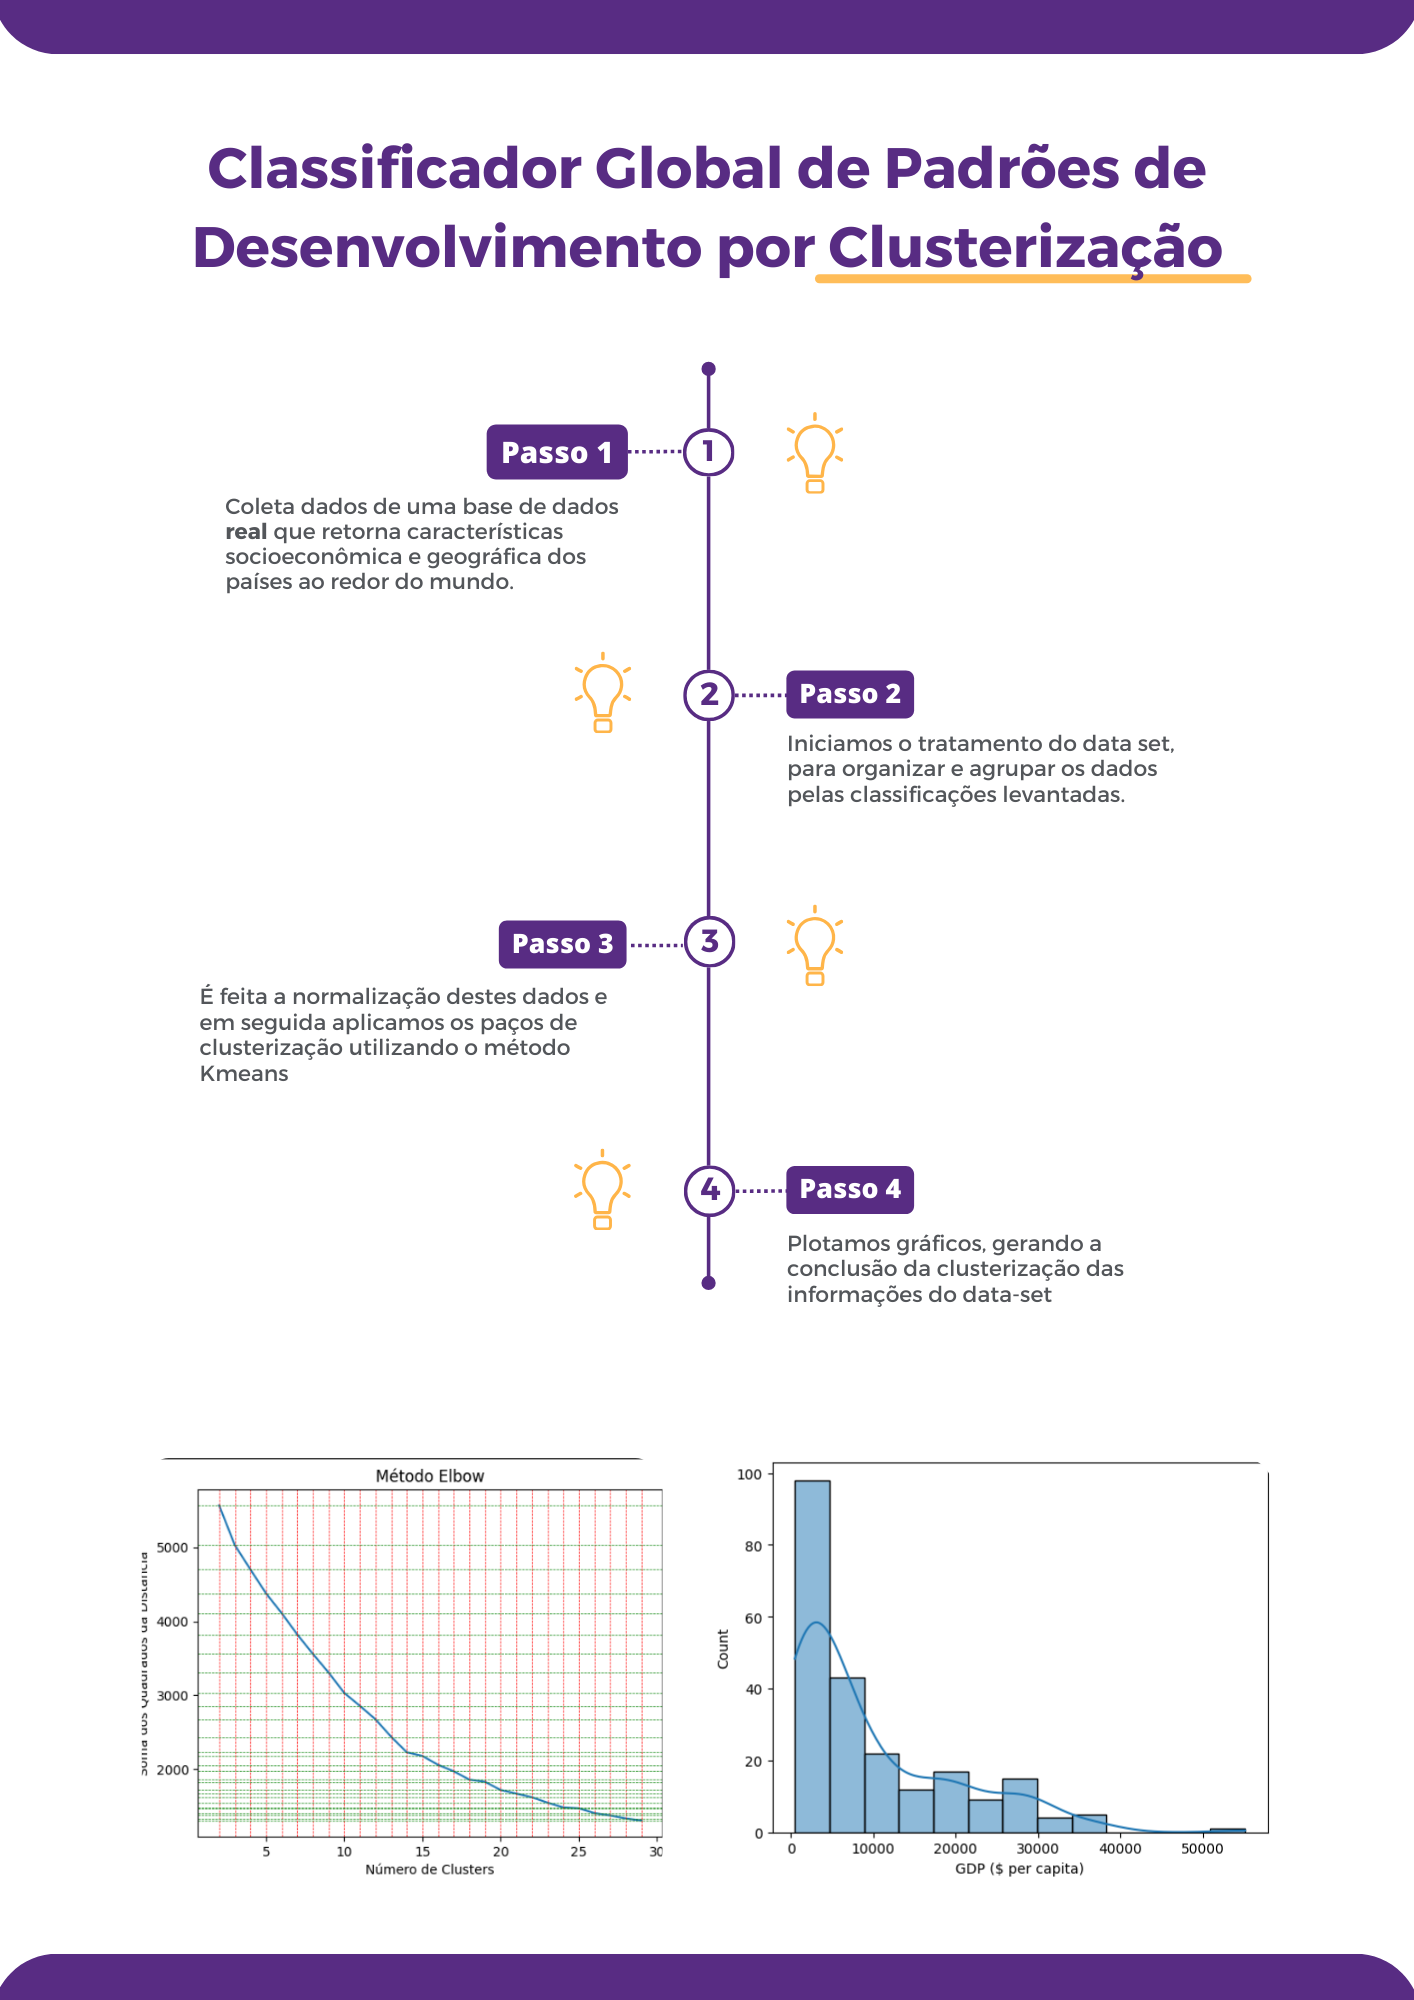

# Links:

Github: https://github.com/EricMencarini/Cluster_Kmeans

Linkedin:
Claudio Quevedo: https://www.linkedin.com/in/claudioquevedo/


Daniel Hudson: https://www.linkedin.com/in/daniel-hudson-0893761b4

Eric Mencarini: https://www.linkedin.com/in/ericmencarini/

# Clusterização de países

Fonte:
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html



**Exemplo da ferramenta de exibição em mapas**

In [ ]:
import plotly.express as px

df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="winner",
                    locations="district", featureidkey="properties.district",
                    projection="mercator", hover_data=["Bergeron", "Coderre", "Joly"]
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

**Importa Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale

**Lê dados dos países**

In [ ]:
df = pd.read_csv('sample_data/CIA_Country_Facts.csv')

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

**Exibe amostragem dos dados lidos**

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,00","0,00","23,06","163,07","700,00","36,00","3,20","12,13","0,22","87,65","1,00","46,60","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,60","1,26","-4,93","21,52","4.500,00","86,50","71,20","21,09","4,42","74,49","3,00","15,11","5,22","0,23","0,19","0,58"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,80","0,04","-0,39","31,00","6.000,00","70,00","78,10","3,22","0,25","96,53","1,00","17,14","4,61","0,10","0,60","0,30"
3,American Samoa,OCEANIA,57794,199,"290,40","58,29","-20,71","9,27","8.000,00","97,00","259,50","10,00","15,00","75,00","2,00","22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,10","0,00","6,60","4,05","19.000,00","100,00","497,20","2,22","0,00","97,78","3,00","8,71","6,25",NaN,NaN,NaN


**Exibe a estrutura dos dados lidos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

**Inverte as linhas/colunas para facilitar a leitura das estatísticas descritivas dos dados lidos**

In [ ]:
def format_number(x):
    return "{:,.2f}".format(x).replace(",", ";").replace(".", ",").replace(";", ".")

pd.set_option('display.float_format', format_number)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,"227,00","28.740.284,37","117.891.326,54","7.026,00","437.624,00","4.786.994,00","17.497.772,50","1.313.973.713,00"
Area (sq. mi.),"227,00","598.226,96","1.790.282,24","2,00","4.647,50","86.600,00","441.811,00","17.075.200,00"
Pop. Density (per sq. mi.),"227,00","379,05","1.660,19","0,00","29,15","78,80","190,15","16.271,50"
Coastline (coast/area ratio),"227,00","21,17","72,29","0,00","0,10","0,73","10,34","870,66"
Net migration,"224,00","0,04","4,89","-20,99","-0,93","0,00","1,00","23,06"
Infant mortality (per 1000 births),"224,00","35,51","35,39","2,29","8,15","21,00","55,70","191,19"
GDP ($ per capita),"226,00","9.689,82","10.049,14","500,00","1.900,00","5.550,00","15.700,00","55.100,00"
Literacy (%),"209,00","82,84","19,72","17,60","70,60","92,50","98,00","100,00"
Phones (per 1000),"223,00","236,06","227,99","0,20","37,80","176,20","389,65","1.035,60"
Arable (%),"225,00","13,80","13,04","0,00","3,22","10,42","20,00","62,11"


# Visualizando os dados

In [ ]:
# Exibi o menor valor da coluna 'GDP ($ per capita)'
menor_valor = df['GDP ($ per capita)'].min()
print("Menor valor de GDP ($ per capita):", menor_valor)

# Exibi o maior valor da coluna 'GDP ($ per capita)'
maior_valor = df['GDP ($ per capita)'].max()
print("Maior valor de GDP ($ per capita):", maior_valor)

Menor valor de GDP ($ per capita): 500.0
Maior valor de GDP ($ per capita): 55100.0


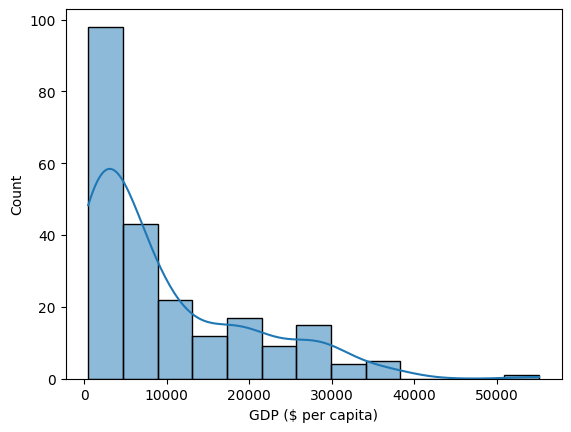

In [ ]:
from sys import builtin_module_names
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df[df['GDP ($ per capita)']<60000], x='GDP ($ per capita)', kde=True)
plt.show()

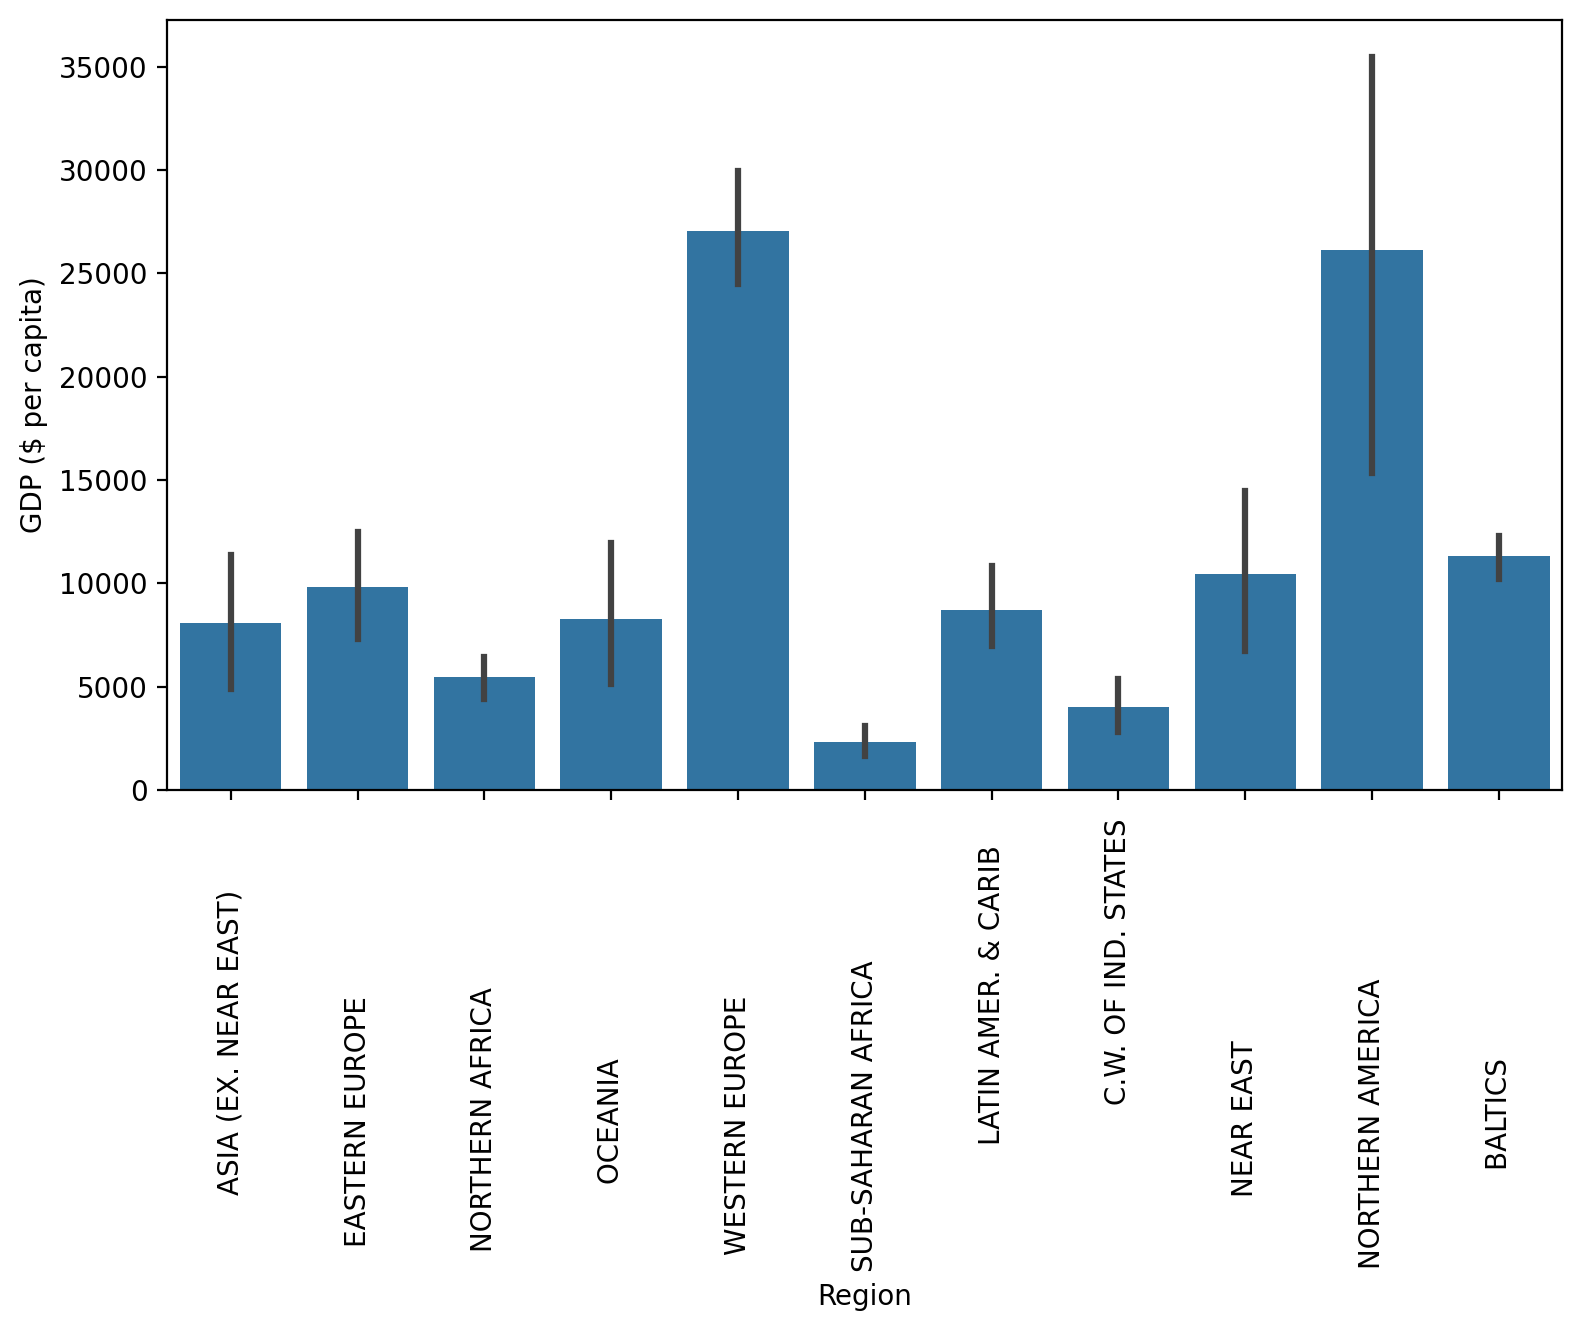

In [ ]:
plt.figure(figsize=(9,5),dpi=200)
sns.barplot(data=df,y='GDP ($ per capita)',x='Region',estimator=np.mean)
plt.xticks(rotation=90);

<Axes: xlabel='GDP ($ per capita)', ylabel='Literacy (%)'>

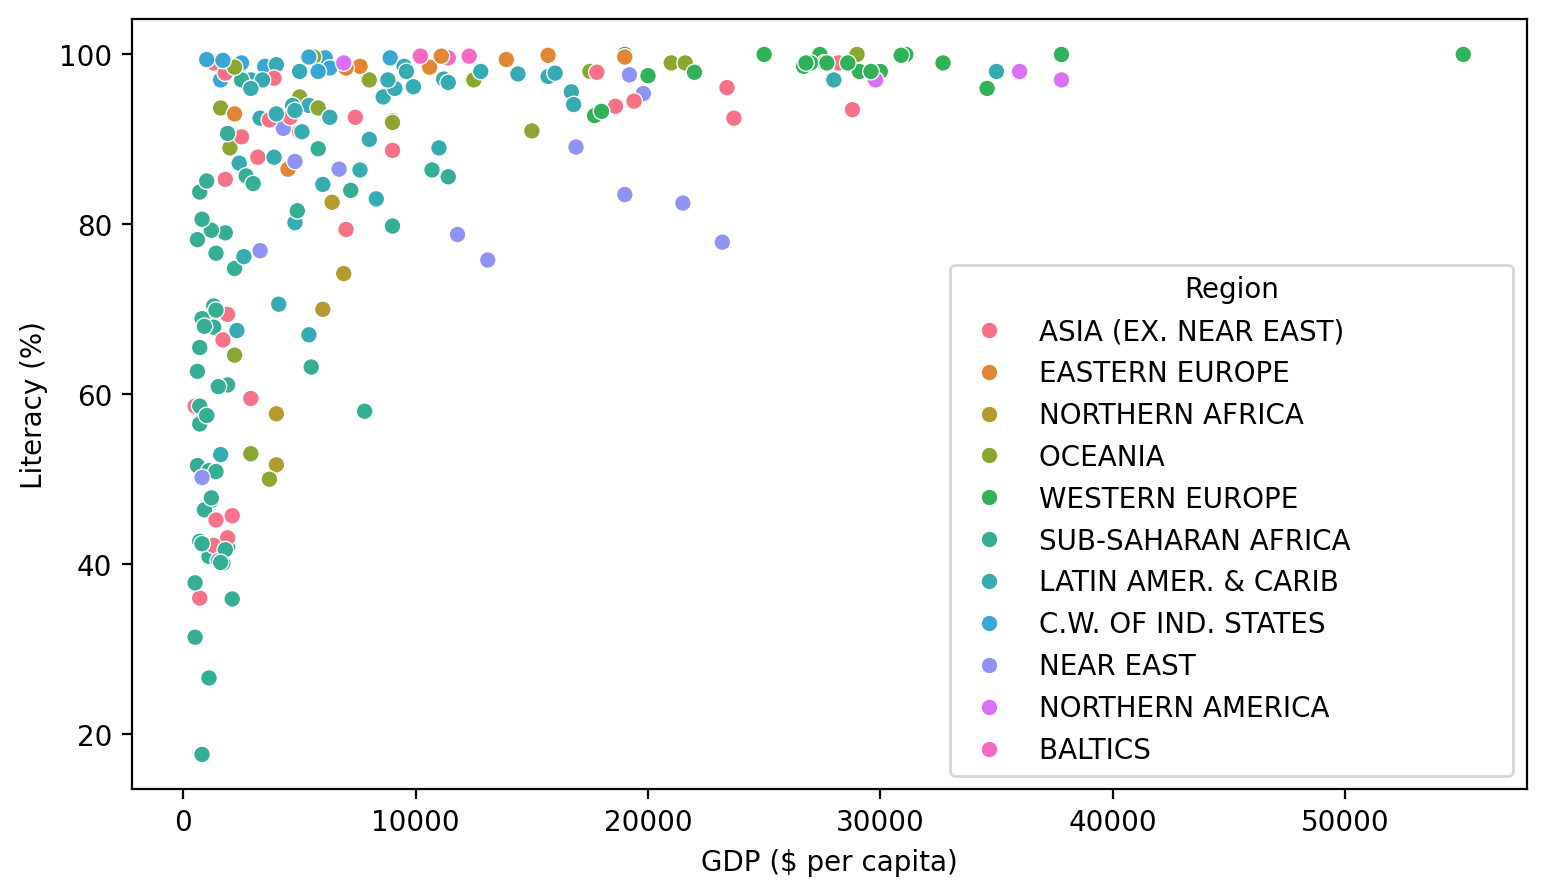

In [ ]:
plt.figure(figsize=(9,5),dpi=200)
sns.scatterplot(data=df,x='GDP ($ per capita)',y='Literacy (%)',hue='Region')

-----

### Valores nulos

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [ ]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [ ]:
df[df['Industry'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
138                  Monaco
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

In [ ]:
df[df['Service'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
138                  Monaco
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
Name: Country, dtype: object

In [ ]:
# REMOVER PEQUENAS ILHAS
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [ ]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [ ]:
# Preenchendo valores com a média de cada grupo
#df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

# Substitui nulo pela mediana de todas as colunas numéricas
colunas_numericas = df.select_dtypes(exclude=['object']).columns
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].median())

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [ ]:
df[df['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [ ]:
# Preenchendo valores com a média de cada grupo
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [ ]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Dropando os dados vazios, já que agora são poucos.**

In [ ]:
df = df.dropna()

## Preparação dos dados

In [ ]:
X = df.drop("Country",axis=1)

In [ ]:
#Dummy variables para colunas strings

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,"48,00","0,00","23,06","163,07","700,00","36,00","3,20","12,13",...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,"124,60","1,26","-4,93","21,52","4.500,00","86,50","71,20","21,09",...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,"13,80","0,04","-0,39","31,00","6.000,00","70,00","78,10","3,22",...,False,False,False,False,False,True,False,False,False,False
3,57794,199,"290,40","58,29","-20,71","9,27","8.000,00","97,00","259,50","10,00",...,False,False,False,False,False,False,False,True,False,False
4,71201,468,"152,10","0,00","6,60","4,05","19.000,00","100,00","497,20","2,22",...,False,False,False,False,False,False,False,False,False,True


### Scaling

**Standard Scaler para equalizar todos os valores**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
scaled_X

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.31928318,
        -0.53830542, -0.37510468],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.31928318,
        -0.53830542, -0.37510468],
       [-0.14654488,  0.08642673, -0.21958445, ..., -0.31928318,
         1.85768146, -0.37510468],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.31928318,
         1.85768146, -0.37510468]])

### KMEANS fit

**Usando um for loop para testar diferentes valores para os parametros KMEANS**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ssd = []

for k in range(2, 30):

    # Determina o método de inicialização k-means++ (default), máximo de iterações de 300,
    # 10 tentativas de inicialização e uma semente randômica para garantir a consistência em cada execução
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=101)

    model.fit(scaled_X)

    #Soma das distâncias dos quadrados para o centro.
    ssd.append(model.inertia_)

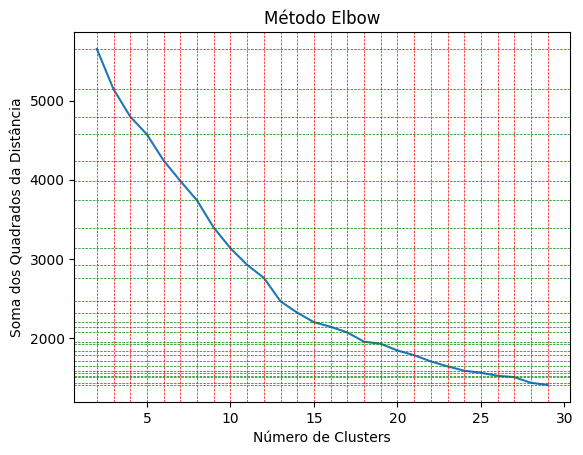

In [ ]:
#plt.plot(range(2,30),ssd,'o--')
#plt.plot(range(2,30), ssd)
#lt.title('Método Elbow')
#lt.xlabel("Número de Clusters")
#plt.ylabel("Soma dos quadrados da distância")

valores_x = range(2, 30)
valores_y = ssd

plt.plot(valores_x, valores_y)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados da Distância')

for x_value in valores_x:
    plt.axvline(x=x_value, color='r', linestyle='--', linewidth=0.5)

for y_value in valores_y:
    plt.axhline(y=y_value, color='g', linestyle='--', linewidth=0.5)

plt.show()

<Axes: >

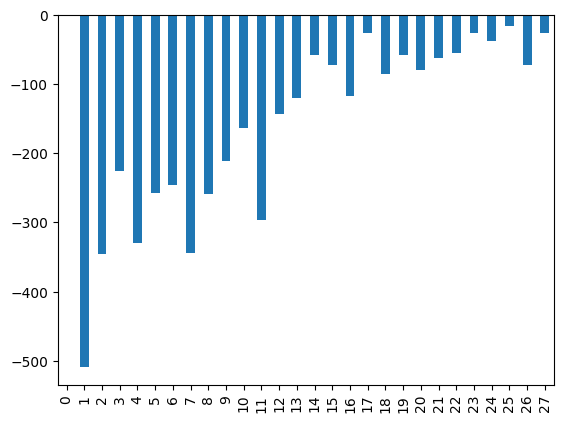

In [ ]:
pd.Series(ssd).diff().plot(kind='bar')

-----

#### Aqui é escolher um valor para K qualquer

In [ ]:
model = KMeans(n_clusters=15)
model.fit(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=15)

In [ ]:
model.labels_

array([ 1,  4,  5,  7,  0,  1, 12, 12, 12,  6, 12,  7,  0,  6, 12,  9, 14,
       12,  6,  0, 12,  1,  8,  2, 12,  4,  1, 12, 12,  2,  4,  1,  2, 14,
        2,  1,  8, 12,  0,  1,  1, 12, 10, 12, 14,  1,  1,  7, 12,  1,  4,
       12,  9,  4,  0,  1, 12, 12,  2, 12,  5, 12,  1,  1,  3,  1,  0,  7,
        0,  0, 12,  7,  1,  1,  9,  6,  0,  1,  0,  0,  8, 12, 12,  7, 12,
        0,  1,  1, 12, 14, 12,  2,  4,  0, 10,  2,  2,  9,  0,  0,  9,  0,
       12,  2,  0,  9,  6,  1,  7,  2,  2,  9,  6,  2,  3,  9,  1,  1,  5,
        0,  3,  0, 11,  4,  1,  1,  2,  2,  1,  0,  7, 12,  1, 14, 14, 12,
       13,  6, 11,  2, 12,  5,  1,  1,  7,  2,  0, 12,  7,  7, 12,  1,  1,
        7,  0,  9,  2,  7, 12,  7, 12, 12,  2,  4,  0, 12,  9, 12,  4,  6,
       14, 12, 12, 12,  8, 12,  7,  0, 14,  9,  1,  4, 12,  1,  2,  4,  4,
        7,  1,  1,  0,  2,  1, 12,  1,  0,  0,  9,  2,  6,  1,  2, 14,  7,
       12,  5,  9,  6, 12,  7, 14,  6,  9,  0,  8, 12,  6,  7, 12,  2, 12,
        7,  9,  5,  9,  1

In [ ]:
X['K=5 Clusters'] = model.labels_

In [ ]:
X.corr()['K=5 Clusters'].sort_values()

Deathrate                                    -0,47
Region_WESTERN EUROPE                        -0,43
Net migration                                -0,25
Infant mortality (per 1000 births)           -0,24
Region_SUB-SAHARAN AFRICA                    -0,22
Region_ASIA (EX. NEAR EAST)                  -0,20
GDP ($ per capita)                           -0,20
Other (%)                                    -0,19
Agriculture                                  -0,16
Climate                                      -0,13
Region_EASTERN EUROPE                        -0,09
Industry                                     -0,07
Region_BALTICS                               -0,07
Phones (per 1000)                            -0,06
Birthrate                                    -0,05
Region_NORTHERN AFRICA                       -0,03
Region_C.W. OF IND. STATES                    0,01
Arable (%)                                    0,03
Area (sq. mi.)                                0,04
Population                     

# Visualização gráfica

In [ ]:
model = KMeans(n_clusters=15)

model.fit(scaled_X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=15)

In [ ]:
model = KMeans(n_clusters=15)

model.fit(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=15)

In [ ]:
iso_codes = pd.read_csv("sample_data/country_iso_codes.csv")

In [ ]:
iso_codes

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA
...,...,...
296,"Congo, Dem. Rep.",COD
297,"Congo, Repub. of the",COG
298,Tanzania,TZA
299,Central African Rep.,CAF


In [ ]:
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()

In [ ]:
iso_mapping

{'Afghanistan': 'AFG',
 'Akrotiri and Dhekelia – See United Kingdom, The': 'Akrotiri and Dhekelia – See United Kingdom, The',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica\u200a[a]': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Ashmore and Cartier Islands – See Australia.': 'Ashmore and Cartier Islands – See Australia.',
 'Australia\u200a[b]': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas (the)': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia (Plurinational State of)': 'BOL',
 'Bonaire\xa0Sint Eustatius\xa0Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory (the)': 'IOT',
 'British V

In [ ]:
df['ISO Code'] = df['Country'].map(iso_mapping)

In [ ]:
# @title
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster",
                    hover_name="Country",
                    color_continuous_scale='Turbo'
                    )
fig.show()

In [ ]:
df['Cluster'] = model.labels_

---

In [ ]:
model = KMeans(n_clusters=5)
model.fit(scaled_X)
iso_codes = pd.read_csv("sample_data/country_iso_codes.csv")
iso_mapping = iso_codes.set_index('Country')['ISO Code'].to_dict()
df['ISO Code'] = df['Country'].map(iso_mapping)
df['Cluster'] = model.labels_

# @title
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster",
                    hover_name="Country",
                    color_continuous_scale='Turbo'
                    )
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

